In [7]:
import pyswmm
import re
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pathlib

font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 12}
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.dpi'] = 600
matplotlib.rcParams["mathtext.fontset"]="dejavuserif"
matplotlib.rcParams['text.usetex'] = False

In [8]:
dir = pathlib.Path.cwd().parent / 'Networks' / 'Modena'
conts = pd.read_csv(dir/'Continuity_Errors_Timesteps.csv')
conts.rename(columns = {conts.columns[0]:'Timestep',"1000m":1000,"250m":250, "100m": 100, "50m":50, "25m":25}, inplace=True)

conts.head()

,Timestep,1000,250,100,50,25
0,10.0,-205.665680,-0.087457,-0.181228,-0.387429,-1.022974
1,11.0,-257.693024,-0.096479,-0.219508,-0.465876,-1.230635
2,12.0,-336.114594,-0.119091,-0.249284,-0.536240,-1.454609
3,13.0,-403.058227,-0.142352,-0.270295,-0.627526,-1.706027
4,14.0,-473.830017,-0.149403,-0.320282,-0.708384,-1.977497


In [9]:
conts.sort_values('Timestep', inplace = True)
conts.reset_index(drop=True, inplace=True)
conts.set_index('Timestep', drop = True, inplace=True)
conts = abs(conts)

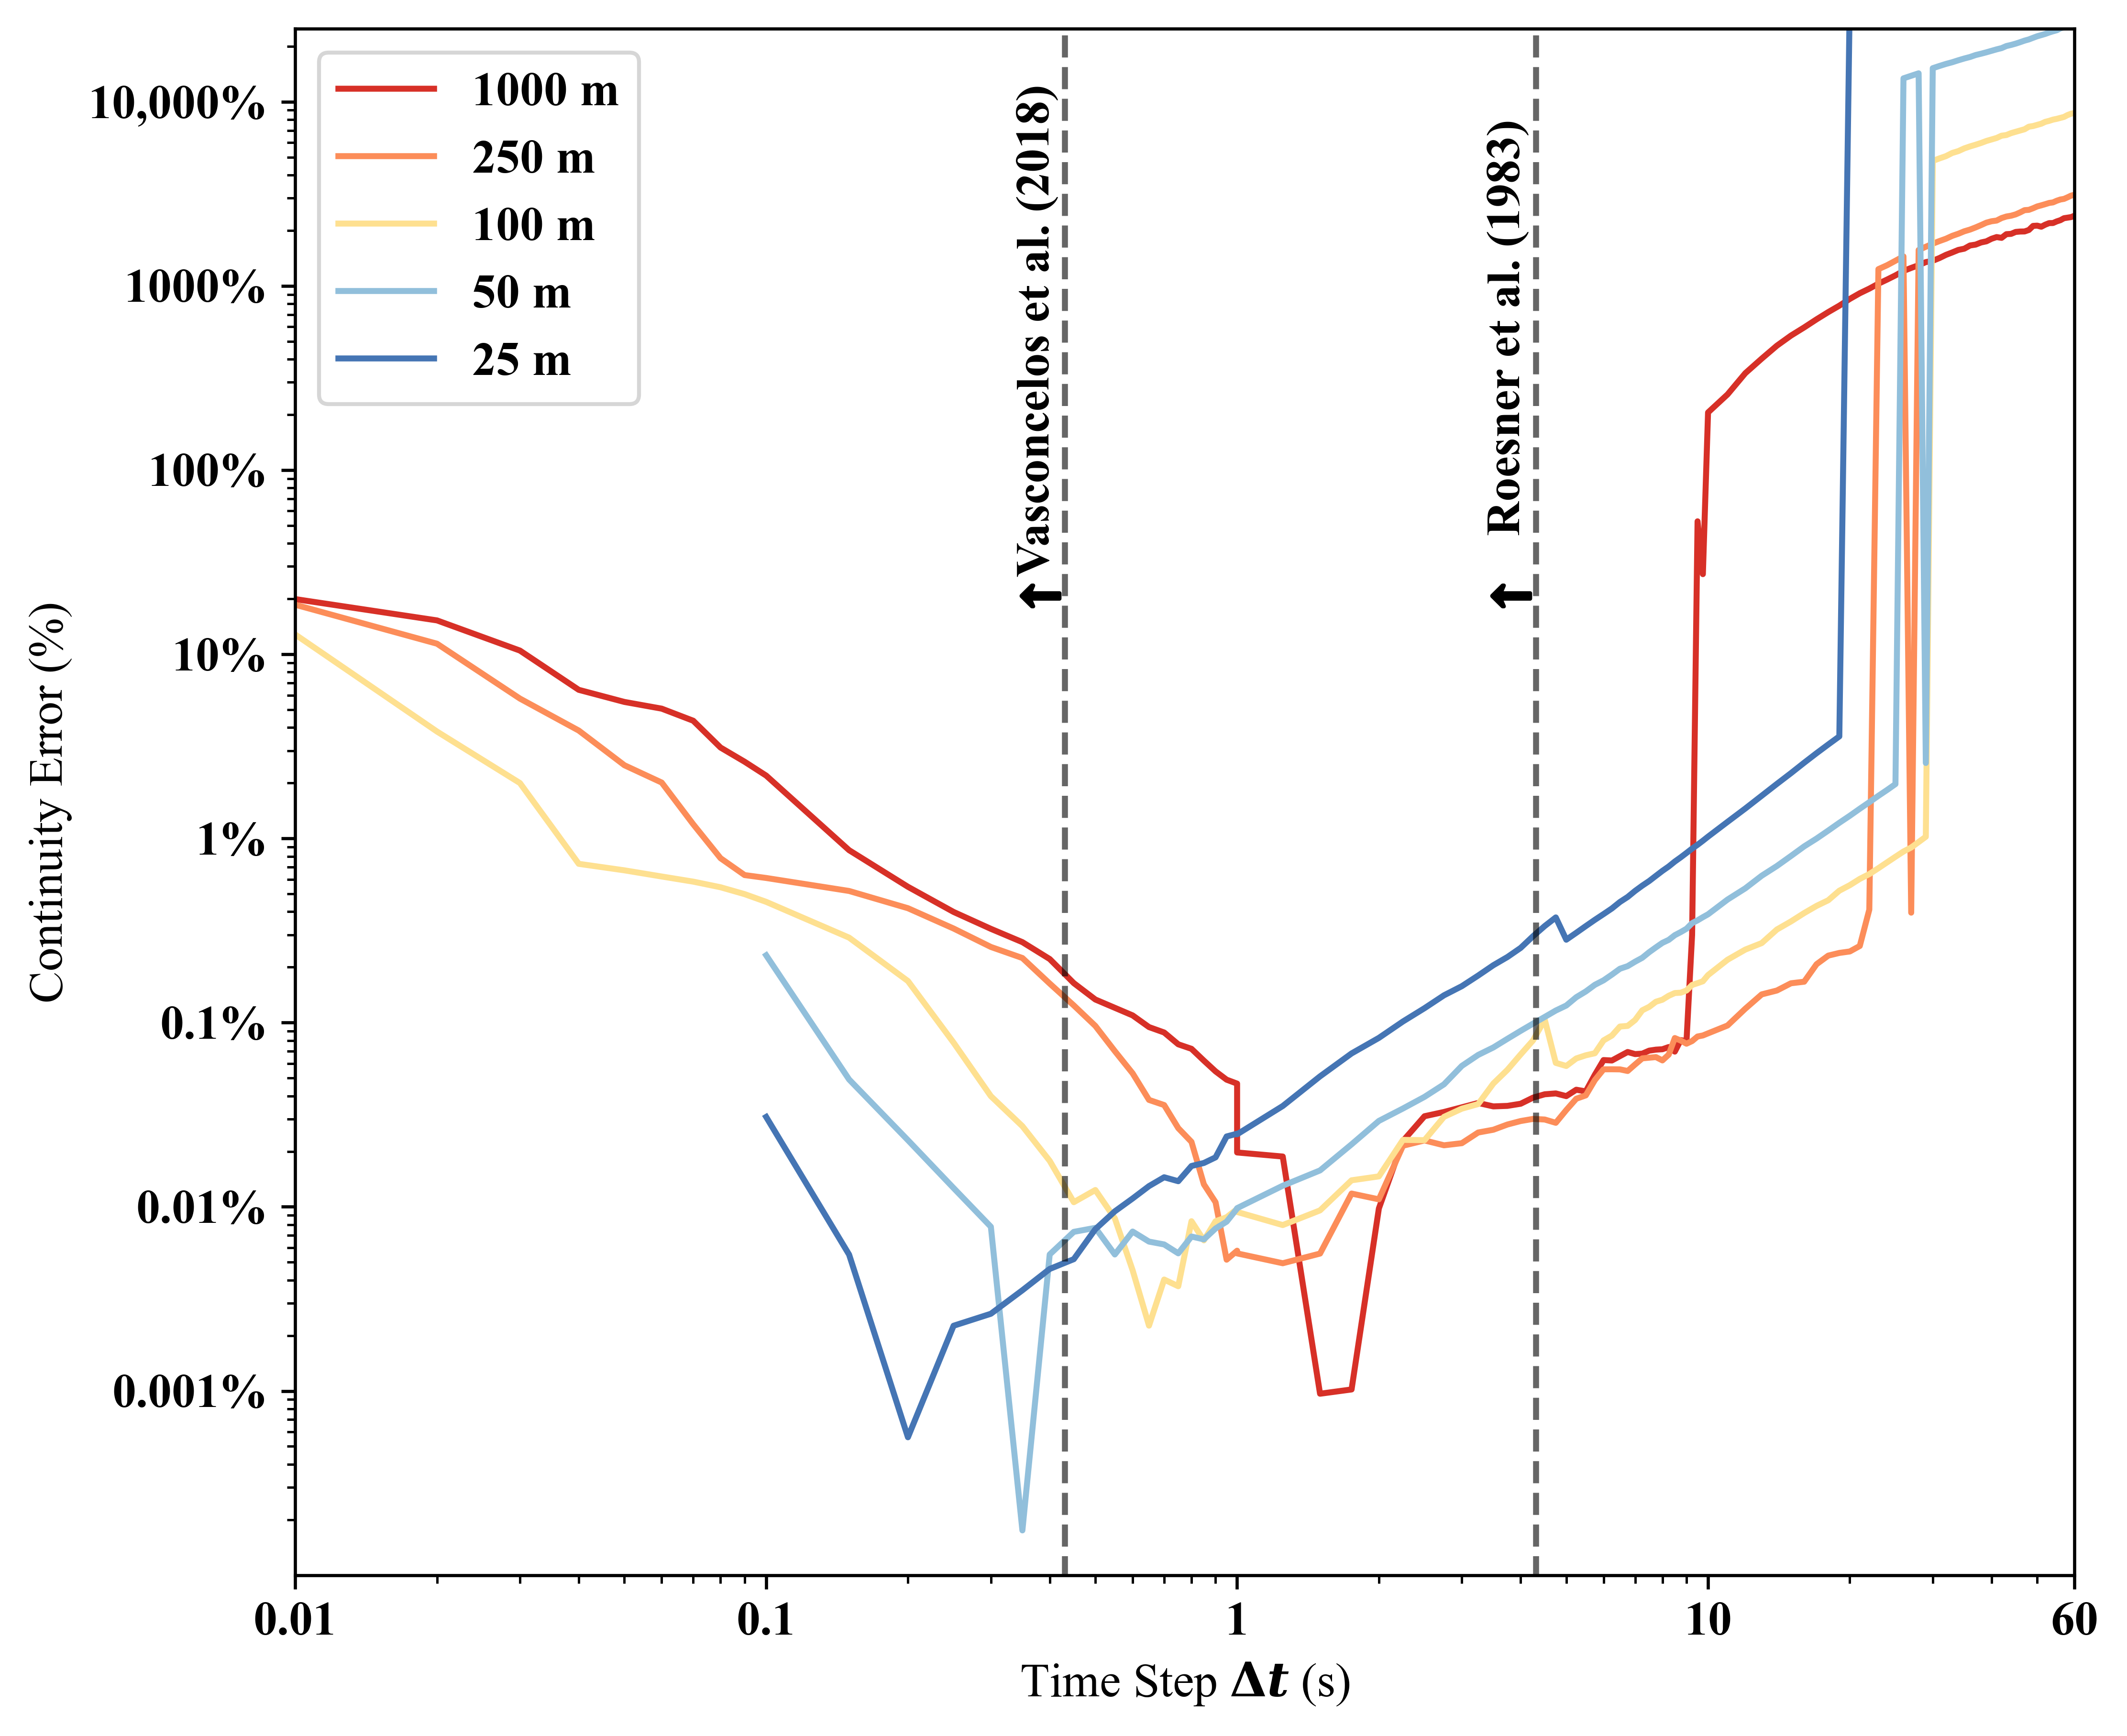

In [10]:
fig, ax = plt.subplots(1,1)

list_of_colors = ['#d73027', '#fc8d59','#fee090','#91bfdb',"#4575b4"]

fig.set_figheight(7)
fig.set_figwidth(8)

min_length = 6.03  #m
max_D =  0.2
vasconcelos_t_max = 0.1 * min_length / np.sqrt(9.81 * max_D)
roesner_t_max = vasconcelos_t_max * 10


ax.set_yscale('log')
ax.set_xscale('log')
ax.plot(conts.index, conts[1000],c=list_of_colors[0], label = r"1000 m")
ax.plot(conts.index, conts[250], c=list_of_colors[1], label = "250 m")
ax.plot(conts.index, conts[100], c=list_of_colors[2], label = "100 m")
ax.plot(conts.index, conts[50], c=list_of_colors[3], label ="50 m")
ax.plot(conts.index, conts[25], c=list_of_colors[4], label ="25 m")
ax.plot([vasconcelos_t_max,vasconcelos_t_max],[0.00001,10000000],ls='dashed',c='black', alpha = 0.6)
ax.plot([roesner_t_max,roesner_t_max],[0.00001,10000000],ls='dashed',c='black', alpha = 0.6)
ax.annotate("Roesner et al. (1983)", (roesner_t_max-0.9,50),xycoords = 'data', rotation = 'vertical',fontsize =12)
ax.annotate("Vasconcelos et al. (2018)", (vasconcelos_t_max-0.09,30),xycoords = 'data', rotation = 'vertical',fontsize =12)
ax.plot(0.38, 20,marker=r'$\leftarrow$', markersize=10,c='black')
ax.plot(3.8, 20,marker=r'$\leftarrow$', markersize=10,c='black')

formatter = plt.LogFormatter(labelOnlyBase=False)
ax.xaxis.set_major_formatter(formatter)
ax.set_xlim(0.1,60)
ax.set_xticks([0.01,0.1,1, 10,60])
ax.set_xticklabels([0.01,0.1,1,10,60])
ax.set_yticks([0.001,0.01,0.1,1,10,100,1000,10000])
ax.set_ylim(0.0001,25000)
ax.set_yticklabels(["0.001%","0.01%","0.1%","1%","10%","100%","1000%","10,000%"])
ax.set_ylabel("Continuity Error (%)")
ax.set_xlabel(r"Time Step $\Delta t$ (s)")
ax.legend()